In [1]:
import matplotlib.pyplot as plt 
import numpy as np

# sigmoidal function that represents dopamine modulation on all areas of network 
def f_mu(X, delta, pars):
    return (1/(np.exp(-pars['mu']*(X-delta))+1)) - 0.5

# sigmoidal function that represents dopamine modulation specifically on nucleus accumbens
def f_lambda(X, delta, pars):
    return (1/(np.exp(-pars['lambda']*(X-delta))+1)) - 0.5

def network(x, t, pars):
    O, C, A, T, S, delta = x
    # dO/dt = -nO + mA + mT + f_mu(O, delta) 
    dO_dt = -pars['n']*O + pars['m']*A + pars['m']*T + f_mu(O,delta,pars)
    # dC/dt = mO - nC + mT + f_mu(C, delta)
    dC_dt = pars['m']*O - pars['n']*C + pars['m']*T + f_mu(C,delta,pars)
    # dA/dt = -aO - aC - n_A*A + mT + m*delta + f_mu(A, delta)
    dA_dt = -pars['a']*O - pars['a']*C - pars['nA']*A + pars['m']*T + pars['m']*delta + f_mu(A,delta,pars)
    # dT/dt = mO + mC + mA - nT + mS + f_mu(T, delta) + 1
    dT_dt = pars['m']*O + pars['m']*C + pars['m']*A - pars['n']*T + pars['m']*S + f_mu(T,delta,pars) + 1
    # dS/dt = b1*O + b2*A + mT - nS - m*delta + f_lambda(S, delta)
    dS_dt = pars['b1']*O + pars['b2']*A + pars['m']*T - pars['n']*S - pars['m']*delta + f_lambda(S,delta,pars)
    # ddelta/dt = m(O + C + A + T + S) - n*delta 
    ddelta_dt = pars['m']*(O + C + A + T + S) - pars['n']*delta
    return (dO_dt, dC_dt, dA_dt, dT_dt, dS_dt, ddelta_dt)


NameError: name 'axes2' is not defined

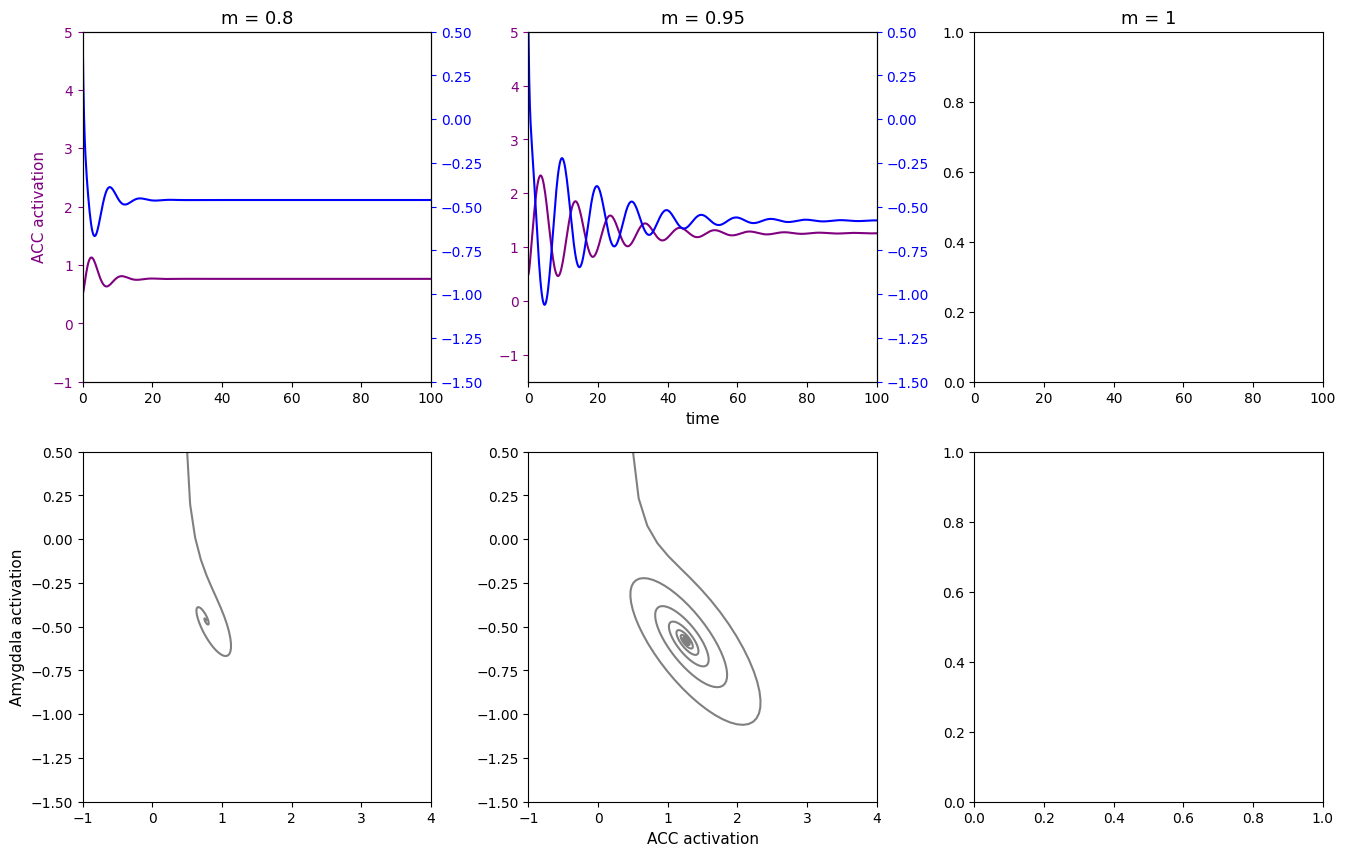

In [2]:
from scipy import integrate

pars = {} 
pars['mu'] = 0.1 # dopamine sensitivity
pars['lambda'] = 0.1 # dopamine sensitivty of nucleus accumbens

pars['nA'] = 1.4 # amygdala self-inhibition strength 
pars['n'] = 1.4 # nA = n

pars['a'] = 2 # corticol inhibition of amygdala strength  
pars['m'] = 1
pars['b1'] = 1.2
pars['b2'] = 1.2

# INITIAL STATE
# O, C, A, T, S, delta = x
x = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
t = np.linspace(0, 200, 1000)

fig, axes = plt.subplots(2, 3, figsize=(16,10))
axes = axes.flatten() 
fig.subplots_adjust(wspace=0.28)

pars['m'] = 0.8
data = integrate.odeint(network, x, t, args=(pars,))
axes[0].set_title("m = 0.8", fontsize=13)
axes[0].set_xlim(0,100)
axes[0].set_ylim(-1,5)
#axes[0].set_xlabel("time", fontsize=11) 
axes[0].set_ylabel("ACC activation", color="purple", fontsize=11)
axes[0].plot(t, data[:,1], color="purple")
axes0 = axes[0].twinx()
axes0.set_ylim(-1.5,0.5)
axes0.plot(t, data[:,2], color="blue")
#axes0.set_ylabel("Amygdala activation", color="blue", fontsize=11)

axes[0].tick_params(axis='y', colors='purple')
axes0.tick_params(axis='y', colors='blue')

axes[3].plot(data[:,1], data[:,2], color="gray")
#axes[3].set_xlabel("ACC activation", fontsize=11) 
axes[3].set_ylabel("Amygdala activation", fontsize=11)
axes[3].set_ylim(-1.50, 0.5)
axes[3].set_xlim(-1, 4)

pars['m'] = 0.95
data = integrate.odeint(network, x, t, args=(pars,))
axes[1].set_title("m = 0.95", fontsize=13)
axes[1].set_xlim(0,100)
axes[1].set_ylim(-1,5)
axes[1].set_xlabel("time", fontsize=11) 
#axes[1].set_ylabel("ACC activation", color="purple", fontsize=11)
axes[1].plot(t, data[:,1], color="purple")

axes1 = axes[1].twinx()
axes1.set_ylim(-1.5,0.5)
#axes1.set_ylabel("Amygdala activation", color="blue", fontsize=11)
axes1.plot(t, data[:,2], color="blue")
axes[1].set_ylim(-1.5,5)

axes[1].tick_params(axis='y', colors='purple')
axes1.tick_params(axis='y', colors='blue')

axes[4].plot(data[:,1], data[:,2],color="gray")
axes[4].set_xlabel("ACC activation", fontsize=11) 
#axes[4].set_ylabel("Amygdala activation", fontsize=11)
axes[4].set_ylim(-1.50, 0.5)
axes[4].set_xlim(-1, 4)

pars['m'] = 1
data = integrate.odeint(network, x, t, args=(pars,))
axes[2].set_title("m = 1", fontsize=13)
axes[2].set_xlim(0,100)
axes2.set_ylim(-1.5,0.5)
#axes[2].set_xlabel("time", fontsize=11) 
#axes[2].set_ylabel("ACC activation", color="purple", fontsize=11)
axes[2].plot(t, data[:,1], color="purple")
axes[2].set_ylim(-1.5,5)
axes2 = axes[2].twinx()
axes2.plot(t, data[:,2],color="blue")
axes2.set_ylabel("Amygdala activation", color="blue", fontsize=11)

axes[2].tick_params(axis='y', colors='purple')
axes2.tick_params(axis='y', colors='blue')

axes[5].plot(data[:,1], data[:,2], color="gray")
axes[5].set_ylim(-1.50, 0.5)
axes[5].set_xlim(-1, 4)
#axes[5].set_xlabel("ACC activation", fontsize=11) 
#axes[5].set_ylabel("Amygdala activation", fontsize=11)


#fig.savefig("alt_ms.png", dpi=300, bbox_inches='tight')

#h


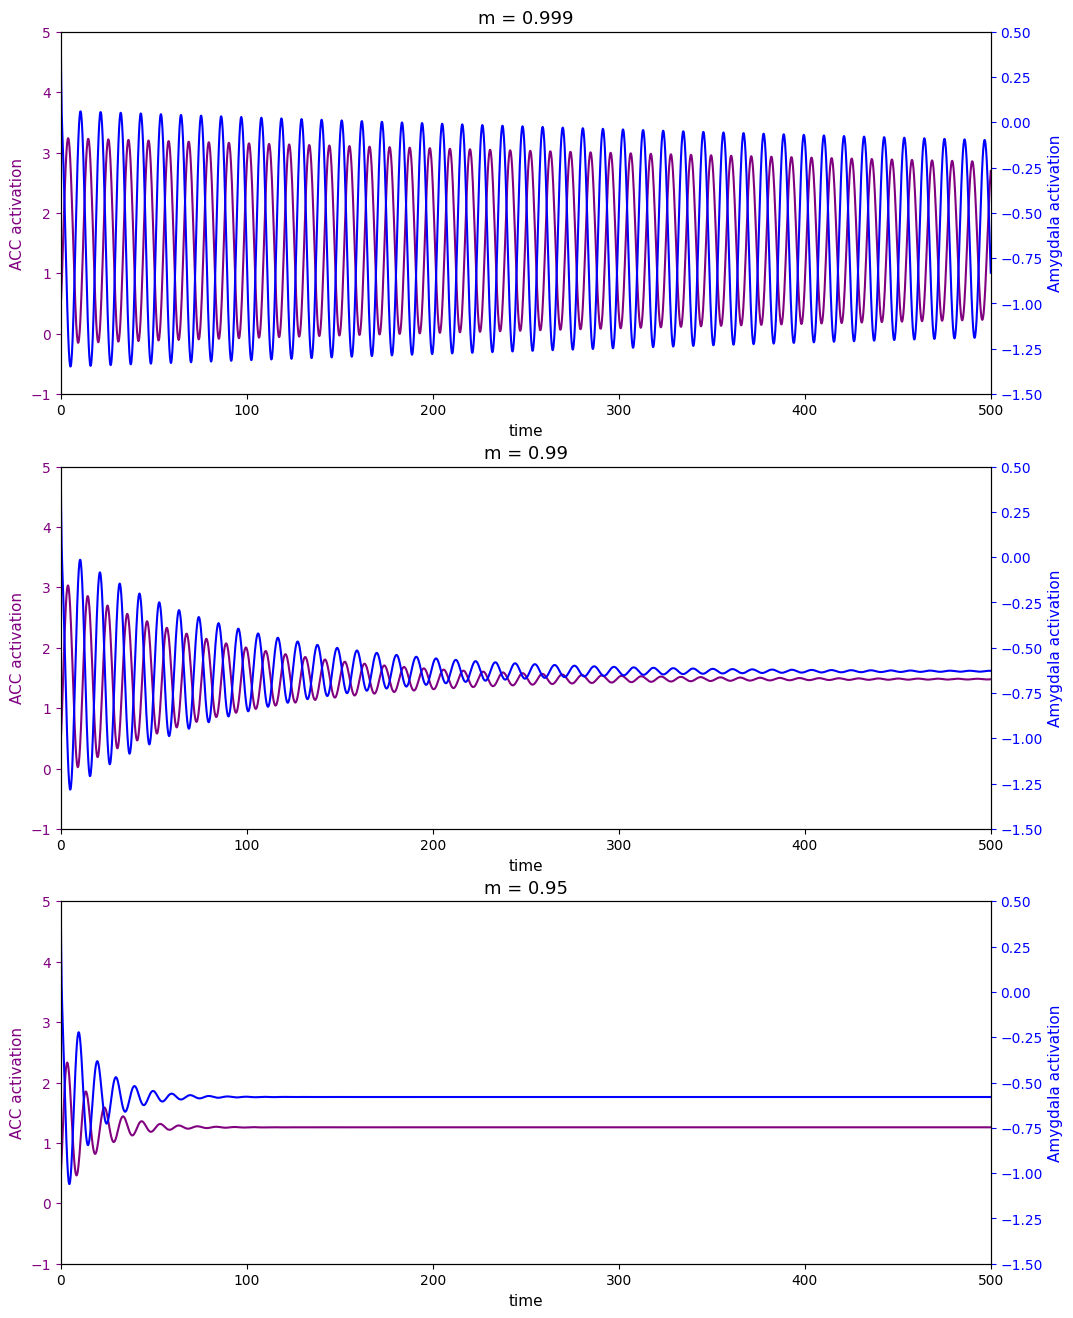

In [20]:
# INITIAL STATE
# O, C, A, T, S, delta = x
x = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
t = np.linspace(0, 500, 3000)

fig, axes = plt.subplots(3, 1, figsize=(12,16))
axes = axes.flatten() 
fig.subplots_adjust(wspace=0.2)

pars['m'] = 0.999
data = integrate.odeint(network, x, t, args=(pars,))
axes[0].set_title("m = 0.999", fontsize=13)
axes[0].set_xlim(0,500)
axes[0].set_ylim(-1,5)
axes[0].set_xlabel("time", fontsize=11) 
axes[0].set_ylabel("ACC activation", color="purple", fontsize=11)
axes[0].plot(t, data[:,1], color="purple")
axes0 = axes[0].twinx()
axes0.set_ylim(-1.5,0.5)
axes0.plot(t, data[:,2], color="blue")
axes0.set_ylabel("Amygdala activation", color="blue", fontsize=11)

axes[0].tick_params(axis='y', colors='purple')
axes0.tick_params(axis='y', colors='blue')

pars['m'] = 0.99
data = integrate.odeint(network, x, t, args=(pars,))
axes[1].set_title("m = 0.99", fontsize=13)
axes[1].set_xlim(0,500)
axes[1].set_ylim(-1,5)
axes[1].set_xlabel("time", fontsize=11) 
axes[1].set_ylabel("ACC activation", color="purple", fontsize=11)
axes[1].plot(t, data[:,1], color="purple")
axes1 = axes[1].twinx()
axes1.set_ylim(-1.5,0.5)
axes1.plot(t, data[:,2], color="blue")
axes1.set_ylabel("Amygdala activation", color="blue", fontsize=11)

axes[1].tick_params(axis='y', colors='purple')
axes1.tick_params(axis='y', colors='blue')

pars['m'] = 0.95
data = integrate.odeint(network, x, t, args=(pars,))
axes[2].set_title("m = 0.95", fontsize=13)
axes[2].set_xlim(0,500)
axes[2].set_ylim(-1,5)
axes[2].set_xlabel("time", fontsize=11) 
axes[2].set_ylabel("ACC activation", color="purple", fontsize=11)
axes[2].plot(t, data[:,1], color="purple")
axes1 = axes[2].twinx()
axes1.set_ylim(-1.5,0.5)
axes1.plot(t, data[:,2], color="blue")
axes1.set_ylabel("Amygdala activation", color="blue", fontsize=11)

axes[2].tick_params(axis='y', colors='purple')
axes1.tick_params(axis='y', colors='blue')

fig.savefig("alt_ms_2.png", dpi=300, bbox_inches='tight')





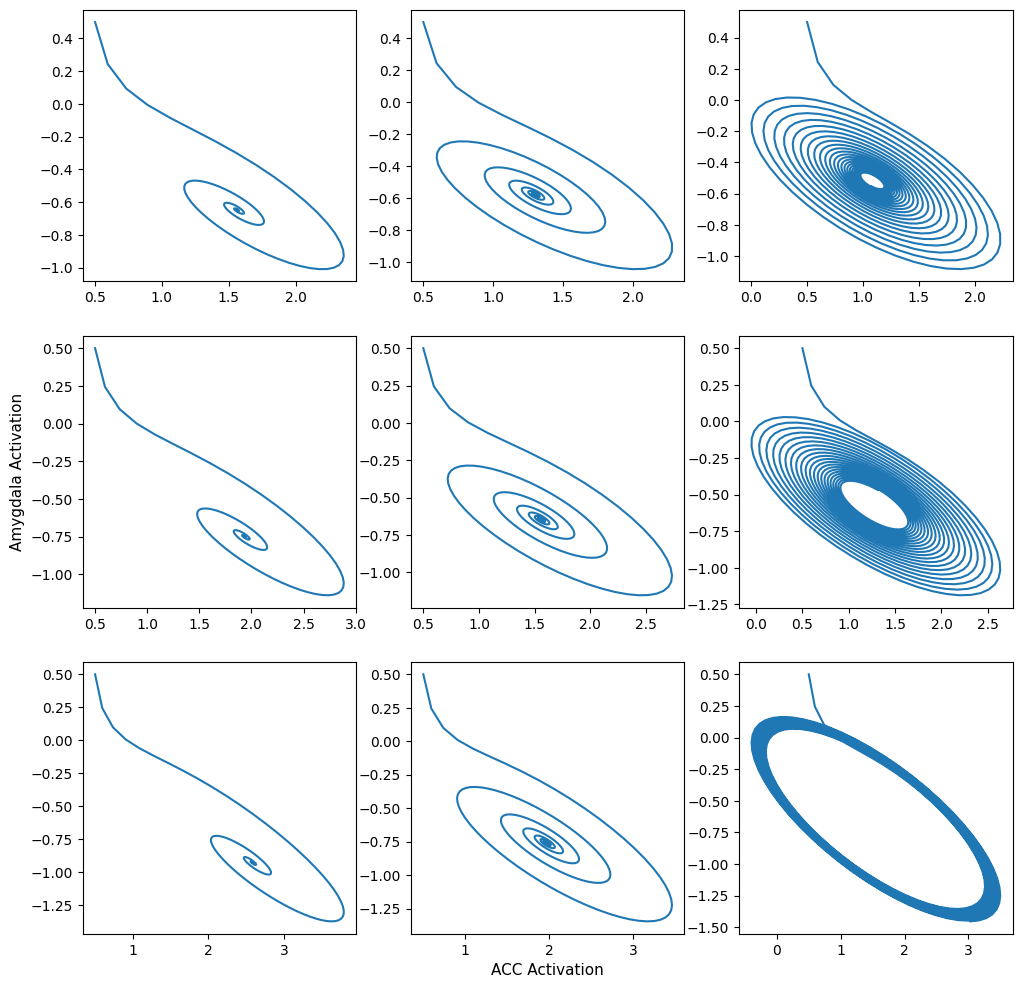

In [4]:
# INITIAL STATE
# O, C, A, T, S, delta = x
x = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
t = np.linspace(0, 200, 1000)

pars['m'] = 1

fig, axes = plt.subplots(3, 3, figsize=(12,12))
axes = axes.flatten() 

pars['b1'] = 0.4
pars['b2'] = 0.4
data = integrate.odeint(network, x, t, args=(pars,))
axes[0].plot(data[:,1], data[:,2])

pars['b1'] = 0.4
pars['b2'] = 0.8
data = integrate.odeint(network, x, t, args=(pars,))
axes[1].plot(data[:,1], data[:,2])

pars['b1'] = 0.4
pars['b2'] = 1.2
data = integrate.odeint(network, x, t, args=(pars,))
axes[2].plot(data[:,1], data[:,2])

pars['b1'] = 0.8
pars['b2'] = 0.4
data = integrate.odeint(network, x, t, args=(pars,))
axes[3].plot(data[:,1], data[:,2])
axes[3].set_ylabel("Amygdala Activation", fontsize=11)

pars['b1'] = 0.8
pars['b2'] = 0.8
data = integrate.odeint(network, x, t, args=(pars,))
axes[4].plot(data[:,1], data[:,2])

pars['b1'] = 0.8
pars['b2'] = 1.2
data = integrate.odeint(network, x, t, args=(pars,))
axes[5].plot(data[:,1], data[:,2])

pars['b1'] = 1.2
pars['b2'] = 0.4
data = integrate.odeint(network, x, t, args=(pars,))
axes[6].plot(data[:,1], data[:,2])

pars['b1'] = 1.2
pars['b2'] = 0.8
data = integrate.odeint(network, x, t, args=(pars,))
axes[7].plot(data[:,1], data[:,2])
axes[7].set_xlabel("ACC Activation", fontsize=11)

pars['b1'] = 1.2
pars['b2'] = 1.2
data = integrate.odeint(network, x, t, args=(pars,))
axes[8].plot(data[:,1], data[:,2])

plt.show()
fig.savefig("fig2_recreation.png", dpi=300, bbox_inches='tight')